<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Информация-об-исследовании-и-обрабатываемых-данных" data-toc-modified-id="Информация-об-исследовании-и-обрабатываемых-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Информация об исследовании и обрабатываемых данных</a></span></li><li><span><a href="#Приоритизация-гипотез." data-toc-modified-id="Приоритизация-гипотез.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез.</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Агрегация-данных" data-toc-modified-id="Агрегация-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Агрегация данных</a></span></li><li><span><a href="#Сравнение-кумулятивной-выручки" data-toc-modified-id="Сравнение-кумулятивной-выручки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение кумулятивной выручки</a></span></li><li><span><a href="#Сравнение-кумулятивного-среднего-чека" data-toc-modified-id="Сравнение-кумулятивного-среднего-чека-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение кумулятивного среднего чека</a></span></li><li><span><a href="#Сравнение-кумулятивной-конверсии" data-toc-modified-id="Сравнение-кумулятивной-конверсии-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Сравнение кумулятивной конверсии</a></span></li><li><span><a href="#Анализ-выбросов-в-данных-о-количестве-заказов" data-toc-modified-id="Анализ-выбросов-в-данных-о-количестве-заказов-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Анализ выбросов в данных о количестве заказов</a></span></li><li><span><a href="#Анализ-выбросов-в-данных-о-стоимости-заказов" data-toc-modified-id="Анализ-выбросов-в-данных-о-стоимости-заказов-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Анализ выбросов в данных о стоимости заказов</a></span></li><li><span><a href="#Подсчет-статистической-значимости-в-различиях-между-группами-теста-по-&quot;сырым&quot;-данным" data-toc-modified-id="Подсчет-статистической-значимости-в-различиях-между-группами-теста-по-&quot;сырым&quot;-данным-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Подсчет статистической значимости в различиях между группами теста по "сырым" данным</a></span></li><li><span><a href="#Подсчет-статистической-значимости-в-различиях-между-группами-теста-по-очищенным-данным" data-toc-modified-id="Подсчет-статистической-значимости-в-различиях-между-группами-теста-по-очищенным-данным-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Подсчет статистической значимости в различиях между группами теста по очищенным данным</a></span></li><li><span><a href="#Выводы-по-результатам-теста." data-toc-modified-id="Выводы-по-результатам-теста.-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Выводы по результатам теста.</a></span></li></ul></li></ul></div>

## Информация об исследовании и обрабатываемых данных

Целью данного проекта является анализ списка гипотез для увеличения выручки. Гипотезы необходимо приоритизировать, провести A/B тест и сделать выводы, исходя из его результатов.

Данные представлены следующими датасетами с информацией о гипотезах:

**Таблица hypothesis**
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

**Таблица orders**

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**Таблцица visitors**

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

В результате изучения данных будет сделан вывод о том, достаточно ли собранных данных для прекращения А/В теста или его рекомендуется продолжить.

## Приоритизация гипотез.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Изучим датафрейм

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

data.style.set_properties(**{'text-align': 'left'})

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез.

In [3]:
data['ICE'] = np.round((data['Impact'] * data['Confidence'])/data['Efforts'], 2)
print(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


Выделяются 3 лидирующие гипотезы: скидка на товар в день рождения, новые каналы привлечения трафика и добавление формы подписки на основные страницы. Можно отметить, что у каждой из данных гипотез высокий уровень уверенности и воздействия и средний уровень трудозатрат.

Для сравнения результатов применим фреймворк RICE.

In [4]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence'])/data['Efforts']
print(data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Гипотеза, находившаяся на третьем месте по результатам предыдущего расчета, переместилась на первое со значительным отрывом. Гипотеза, которая была на первом месте, сейчас на 5-м. 

Это произошло из-за того, что охват гипотезы о добавлении формы подписки в 10 раз больше, чем у гипотезы о запуске акции со скидкой в день рождения. Охват гипотез о добавлении новых функций для всего сайта в целом по таблице выше, чем акции, которыми клиенты будут пользоваться время от времени.

Можно отметить, что в топ-3 гипотез вошли одновременно гипотезы 7 и 0, т.к. у них высший бал по одному их факторов (гипотеза 7 - охват, гипотеза 0 - воздействие). Таким образом рекомендуется проводить тестирование данных гипотез в первую очередь.

## Анализ A/B-теста

### Предобработка данных

Изучим данные из файлов с результатами А/В теста.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [6]:
print(orders.info())
print()
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Проверим количество пропусков в таблицах.

In [7]:
print(orders.duplicated().sum(), visitors.duplicated().sum())

0 0


Пропуски отсутствуют.

В обеих таблицах дата сохранена в формате строки - ее необходимо перевести в формат datetime.

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим, есть ли в таблицы с заказами пользователи, которые попадают сразу в обе группы теста.

In [9]:
a = list(orders.query('group == "A"')['visitorId'])
b = list(orders.query('group == "B"')['visitorId'])
result = [id for id in a if id in b]
print('Количество пересекающихся пользователей: {:.0f}'.format(len(result)))

Количество пересекающихся пользователей: 89


Проверим, сколько строк в таблице с пользователями, которые могли видеть сразу 2 варианта теста.

In [10]:
orders.query('visitorId in @result')

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
1182,2682156369,1668030113,2019-08-14,1290,B
1183,1458356232,963407295,2019-08-14,4940,A
1184,1329499668,2949041841,2019-08-14,10380,B
1189,4082620617,393266494,2019-08-14,31550,B


Необходимо решить, стоит ли удалять пользователей, которые видели оба варианта теста. В случае удаления, они пропадут только из таблицы с заказами. Поскольку таблица с визитами содержит уже агрегированные данные, то мы не сможем удалить из нее этих пользователей. В итоге оказывается, что выполняются не совсем корректные действия, которые будут снижать итоговую конверсию. 

Так как пользователей, которые видели оба варианта теста, немного, оставим их в таблице.

### Агрегация данных

Для подсчета кумулятивных значений необходимо создать единую таблицу с агрегированными по дням данными о заказах и пользователях. Затем данные из этой таблицы можно будет разделить по группе теста и проанализировать.

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [12]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Проверим по колонке с датой, совпадают ли данные в единой таблице с исходными данными.

In [13]:
if cumulativeData['date'].min() == orders['date'].min() and cumulativeData['date'].max() == orders['date'].max():
    print('Расхождения отсутствуют')
else:
    print('Есть расхождения')

Расхождения отсутствуют


### Сравнение кумулятивной выручки

Разобьем информацию в общей таблице по группам и построим график.

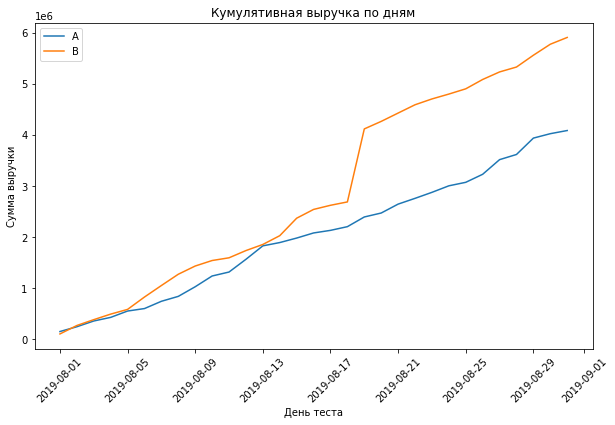

In [14]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням')
plt.xlabel('День теста')
plt.ylabel('Сумма выручки')
plt.xticks(rotation = 45)
plt.legend() 
plt.show()

В начале теста выручка росла относительно равномерно, но после 13 дня группа B опережает группу А. Также можно наблюдать резкий рост в 17 день теста. Это может говорить об аномально больших суммах заказов, либо об их большом количестве влияющих на результаты. Если это так, аномальные данные необходимо будет удалить.

### Сравнение кумулятивного среднего чека

Для подсчета кумулятивного среднего чека кумулятивную выручку необходимо разделить на число заказов.

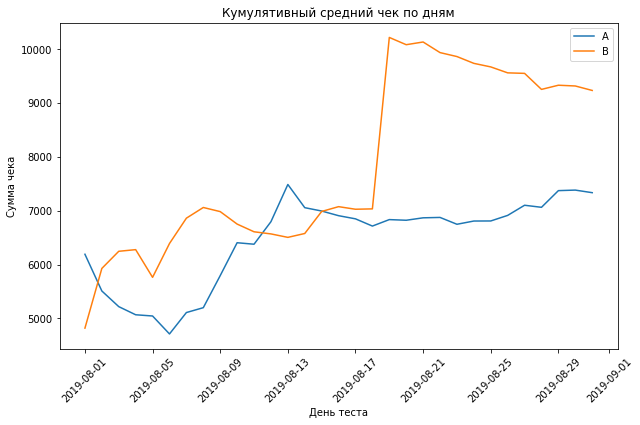

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('День теста')
plt.ylabel('Сумма чека')
plt.title('Кумулятивный средний чек по дням')
plt.xticks(rotation = 45)
plt.legend() 
plt.show()

На графике видны сильные колебания кумулятивного значения среднего чека в начале теста, далее вновь резкий рост в 17 день, после чего графики начинают выравниваться. Вероятно требуется дополнительный анализ влияющих на результаты выбросов.

Построим график относительного различия для среднего чека группы В к группе А. Для этого объединим таблицы кумулятивной выручки по группам.

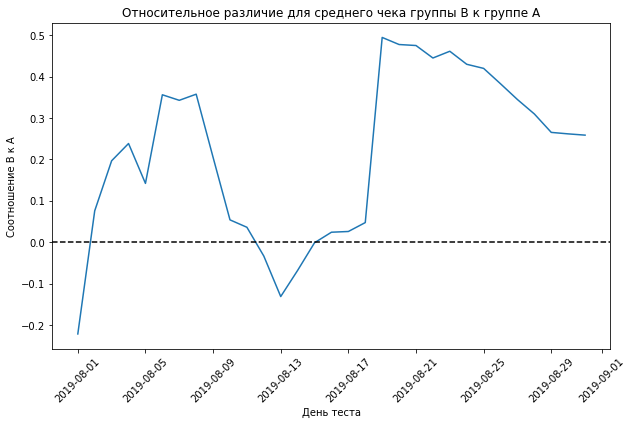

In [16]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('День теста')
plt.ylabel('Соотношение В к А')
plt.title('Относительное различие для среднего чека группы В к группе А')
plt.xticks(rotation = 45)
plt.show() 

Результаты теста значительно и резко меняются в несколько дат: 4, 6, 8, отмеченный ранее 17. Вероятно в эти даты имели место аномальные заказы.

### Сравнение кумулятивной конверсии

Кумулятивную конверсию можно проанализировать аналогично тому, как это было сделано для суммы чеков.

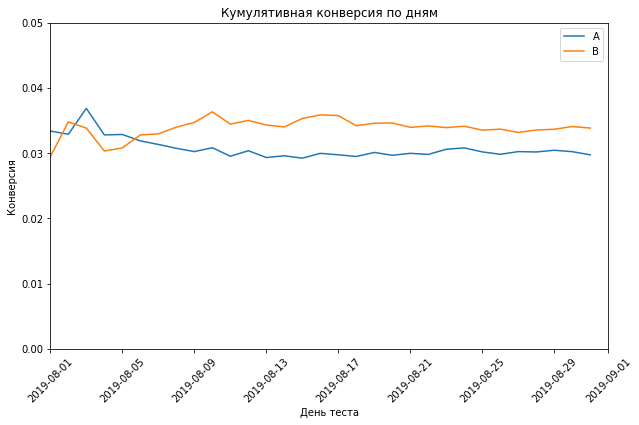

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('День теста')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по дням')
plt.xticks(rotation = 45)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

Первые несколько дней можно видеть колебания графиков. После 5 дня конверсия группы B обогнала конверсию группы А. К концу теста оба графика зафиксировались, причем значение группы B стабильно больше группы A.

Построим график относительного различия кумулятивных конверсий. Для этого, как и в случае с чеками, объединим таблицы с кумулятивными конверсиями по группам.

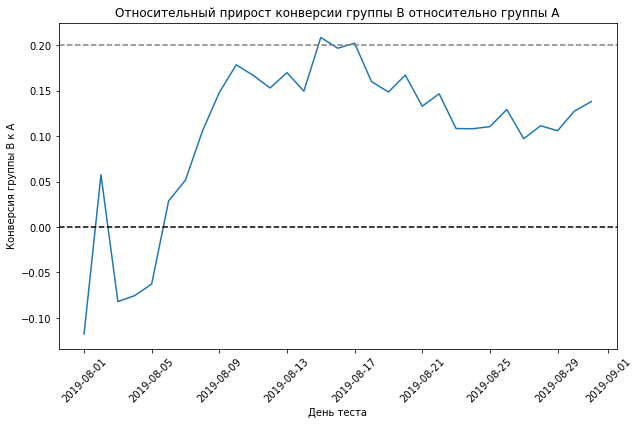

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', right_on='date', how='left',
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel('День теста')
plt.ylabel('Конверсия группы В к А')
plt.title('Относительный прирост конверсии группы B относительно группы А')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xticks(rotation = 45)
plt.show()

Судя по графику, отношение по конверсии еще не установилось: видны сильные колебания, с начала теста конверсия успела 2 раза резко вырасти, затем упасть, и в настоящее время снова растет.

### Анализ выбросов в данных о количестве заказов

Для изучения выбросов подсчитаем число заказов каждого пользователя.

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head())

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


Теперь можно построить точечный график количества заказов по пользователям.

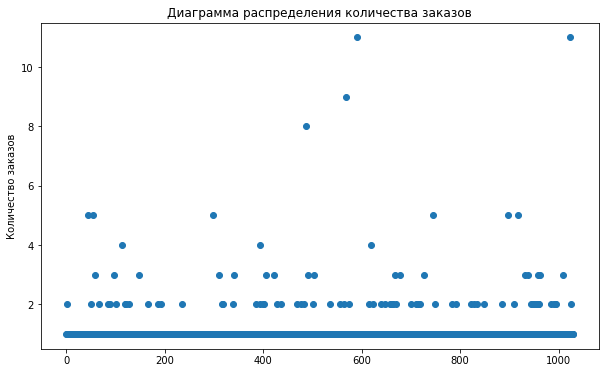

In [20]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов')
plt.title('Диаграмма распределения количества заказов')
plt.show()

На диаграмме видно то, что пользователи, сделавшие больше двух заказов - единичные случаи. 

Посчитаем выборочные перцентили, чтобы выяснить, какое количество заказов на пользователя можно считать аномалиями и отсеять крайние значения.

In [21]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 1% пользователей совершали больше 2 заказов.

### Анализ выбросов в данных о стоимости заказов

Построим диаграмму данных о стоимости заказов.

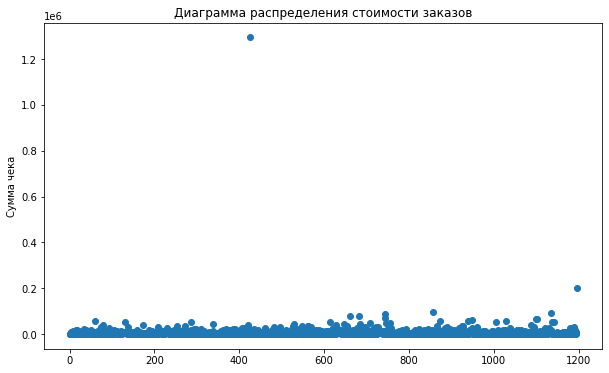

In [22]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Сумма чека')
plt.title('Диаграмма распределения стоимости заказов')
plt.show()

Чтобы изучить данные, не являющиеся выбросами, добавим еще один график для стандартных сумм чека.

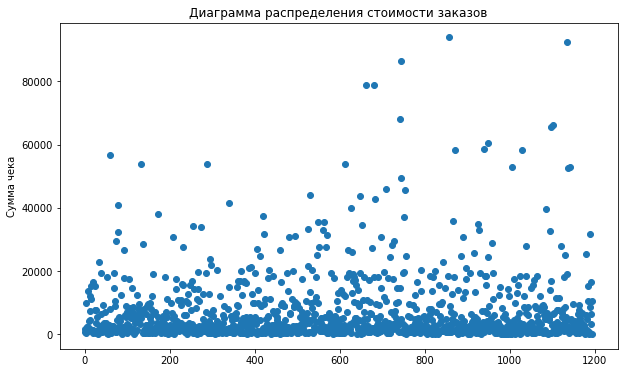

In [23]:
normal_orders = orders.loc[orders['revenue']<100000]
x_values = pd.Series(range(0, len(normal_orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, normal_orders['revenue'])
plt.ylabel('Сумма чека')
plt.title('Диаграмма распределения стоимости заказов')
plt.show()

Большинство чеков сосредоточены в диапазоне до 20000. Чеки больше 80000 уже редкость.

На полученной диаграмме можно наблюдать 2 значительных выброса: один на сумме в 200000, второй - 1200000. Из-за большого расхождения с остальными заказами они влияют на результат и должны быть отсеяны.

Выберем границу для отсеивания аномальных заказов.

In [24]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% заказов были дороже 28000. Все, что свыше это суммы, может быть отсеяно.

### Подсчет статистической значимости в различиях между группами теста по "сырым" данным

Для подсчета статистической значимости в различиях по данным теста необходимо **создать сводную таблицу**, на этот раз сгруппировав данные по дате.

Создадим переменные с подсчетом числа заказов для пользователей, совершивших хотя бы 1 покупку.

In [25]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  
0           101217               719               713  
1           165531               619               581  
2           114248               507               509  
3           108571               717               770  
4            92428               756               707  


In [26]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Теперь создадим переменные, в которых пользователям с заказами соответсвует число заказов, а пользователям без заказов - нули.

In [27]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

Сформулируем гипотезы:
* Н0 - статистически значимых различий между конверсией группы А и конверсией группы В нет.
* Н1 - имеются статистически значимые различия между конверсией группы А и конверсией группы В.

Подсчитаем **статистическую значимость различия конверсии между группами** и относительный прирост конверсии группы B относительно группы А.

Возьмем значение alpha равным 0.05. Поскольку здесь и далее сравниваются 2 выборки по уровню количественно измеренных признаков (средний чек и конверсия), а в данных имеются большие выбросы, для подсчета p-value применяться будет U-критерий Манна-Уитни.

In [28]:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value:', "{0:.3f}".format(p_value))
print('соотношение конверсии группы В к группе А:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-value: 0.017
соотношение конверсии группы В к группе А: 0.138
Отвергаем нулевую гипотезу: разница статистически значима


Первое число - p-value - меньше 0.05. Это позволяет отвергнуть нулевую гипотезу об отсутствии различий между конверсией двух групп, однако поскольку данные еще не очищены от выбросов, выводы делать рано.

Прирост конверсии группы В составляет 13,8%.

Теперь посчитаем **статистическую значимость в чеке между двумя группами**. Сформулируем гипотезы:
* Н0 - статистически значимые различия в среднем чеке между группами отсутствуют
* Н1 - имеются статистически значимые различия в среднем чеке между группами

Возьмем значение alpha равным 0.05. Средний чек также является количественным критерием, для подсчета p-value применяться будет U-критерий Манна-Уитни.

In [29]:
alpha = 0.05
p_value = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'],
    orders[orders['group']=='B']['revenue'])[1]
print('p-value:', '{0:.3f}'.format(p_value))
print('соотношение средних чеков группы В к группе А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                       /orders[orders['group']=='A']['revenue'].mean()-1)) 
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-value: 0.729
соотношение средних чеков группы В к группе А: 0.259
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


В данном случае p-value значительно больше 0.05, следовательно нет причин отвергать нулевую гипотезу. 
При подсчете среднего без учета статистических данных результат оказывается в пользу группы В.

### Подсчет статистической значимости в различиях между группами теста по очищенным данным

По результатам сделанных ранее расчетов перцентилей объединим пользователей с наибольшим числом заказов и пользователей с дорогими заказами в таблице abnormalUsers. 

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [90, 95, 99])[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [90, 95, 99])[1]]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [90, 95, 99])[1]]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Получилось 68 аномальных пользователей. Необходимо удалить их данные и сравнить результаты теста. Подготовим выборки по группам с очищенными данными.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сначала рассчитаем статистическую значимость и прирост группы В для **конверсии**. alpha, как и ранее, возьмем 0.05 и применим критерий Манна-Уитни.

In [32]:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value:', '{0:.3f}'.format(p_value))
print('соотношение конверсии группы В к группе А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-value: 0.013
соотношение конверсии группы В к группе А: 0.173
Отвергаем нулевую гипотезу: разница статистически значима


p-value также остался меньше 0.05, что позволяет отвергнуть нулевую гипотезу об отсутствии различий между конверсией группы А и группы В.

Прирост конверсии группы В увеличился с 13% до 17%.

Теперь рассчитаем статистическую значимость и прирост группы В для **среднего чека**. Возьмем alpha, равное 0.05 и применим критерий Манна-Уитни.

In [33]:
alpha = 0.05
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
print('p-value:', '{0:.3f}'.format(p_value))

print('соотношение средних чеков группы В к группе А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-value: 0.738
соотношение средних чеков группы В к группе А: -0.020
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


p-value остался значительно больше 0.05, в то же время значительно просело соотношение средних чеков. Хотя расчеты не позволяют отвергнуть нулевую гипотезу, можно сделать вывод о том, что выбросы влияли на средний чек в неочищенных данных группы В.

### Выводы по результатам теста.

Имеющиеся факты:
* Имеются статистически значимые различия по конверсии между группами и по "сырым" данным, и по данным, очищенным от аномалий;
* Нет статистически значимого различия по среднему чеку между группами как по "сырым" данным, так и по данным, очищенным от аномалий;
* На графиках различия конверсии и средних чеков между группами в настоящее время результаты группы В лучше, чем у группы А, однако графики подвержены сильным колебаниям.

В пользу завершения теста говорят следующие факты: 
* чек между группами не различается, но конверсия группы В статистически значимо выше, чем конверсия группы А (прирост конверсии пересек нулевое значение уже на 5 день теста, и далее оставался выше 0) - можно сделать вывод, что группа В является более успешной
* 30 дней - достаточный срок для получения результатов изменения конверсии и достаточно длительный срок на проведение теста для бизнеса
* поскольку целью теста является повышение выручки, то за счет повысившейся конверсии при неизменном среднем чеке она вырастет

Если же целью компании является также повышение среднего чека, желательно проверить другие варианты его увеличения. Возможно они дадут более стабильный результат.

Также можно дать рекомендацию относительно сбора результатов теста. Большое количество пользователей, совершившие много покупок, попало сразу в обе группы. Такая ошибка может критически сдвинуть результаты расчетов и сделать исследование нерелевантным.